C:\Users\Lenovo\AppData\Local\Temp\ipykernel_11416\15381801.py:16: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['trending_date'] = pd.to_datetime(data['trending_date'], errors='coerce')


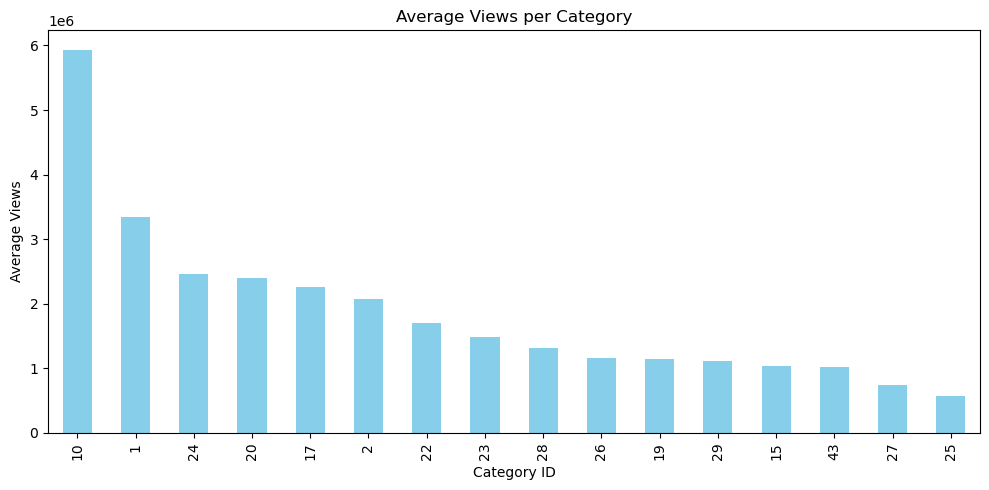

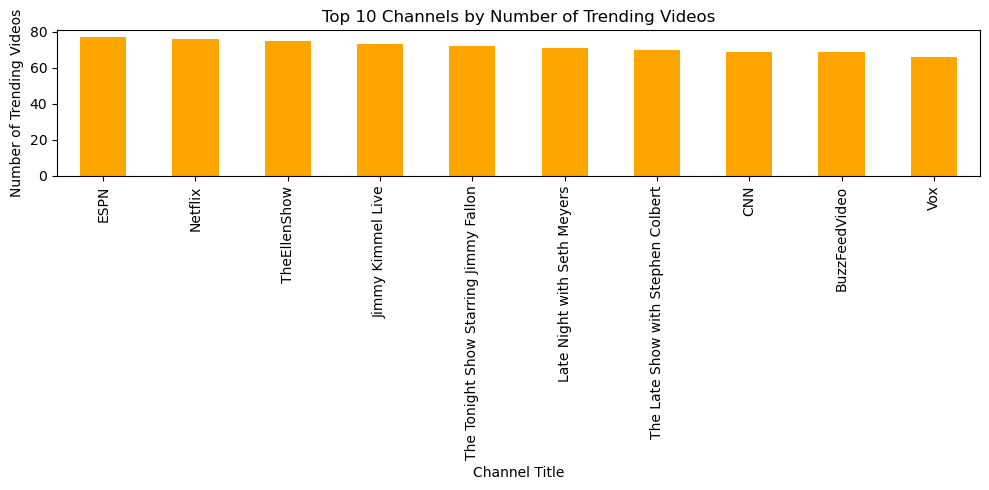

Model Accuracy: 0.9171905484500326

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.93      0.92      2293
           1       0.93      0.90      0.92      2320

    accuracy                           0.92      4613
   macro avg       0.92      0.92      0.92      4613
weighted avg       0.92      0.92      0.92      4613



In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# 1. Load Dataset
data = pd.read_csv(r"C:\ABDUL WASAY\Zain Big Data\USvideos.csv")

# 2. Data Cleaning
data = data.drop_duplicates()
data = data.dropna(subset=['views', 'likes', 'dislikes', 'comment_count'])

# 3. Convert Dates (fix tz mismatch by removing timezones)
data['trending_date'] = pd.to_datetime(data['trending_date'], errors='coerce')
data['publish_time'] = pd.to_datetime(data['publish_time'], errors='coerce').dt.tz_localize(None)

# 4. Drop rows with invalid dates after conversion
data = data.dropna(subset=['trending_date', 'publish_time'])

# 5. Feature Engineering
data['engagement'] = (data['likes'] + data['comment_count']) / (data['views'] + 1)
data['trending_delay'] = (data['trending_date'] - data['publish_time']).dt.days
data['trending'] = np.where(data['views'] > data['views'].median(), 1, 0)

# 6. Data Aggregation
category_views = data.groupby('category_id')['views'].mean().sort_values(ascending=False)
top_channels = data['channel_title'].value_counts().head(10)

# 7. Visualization – Average Views per Category
plt.figure(figsize=(10, 5))
category_views.plot(kind='bar', color='skyblue')
plt.title("Average Views per Category")
plt.xlabel("Category ID")
plt.ylabel("Average Views")
plt.tight_layout()
plt.show()

# 8. Visualization – Top 10 Channels
plt.figure(figsize=(10, 5))
top_channels.plot(kind='bar', color='orange')
plt.title("Top 10 Channels by Number of Trending Videos")
plt.xlabel("Channel Title")
plt.ylabel("Number of Trending Videos")
plt.tight_layout()
plt.show()

# 9. AI Component – Predicting if a Video Will Trend
features = data[['likes', 'dislikes', 'comment_count']]
labels = data['trending']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 10. Model Evaluation
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
